In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Gather data

[Source: Original Research Paper](https://deepblue.lib.umich.edu/handle/2027.42/22636)

In [2]:
boston_dataset = load_boston()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
#

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
# Actual prices in thousands (000)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Data exploration with Pandas dataframes

In [11]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

In [12]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [13]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [14]:
# show # of rows for each column
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Cleaning data - check for missng values

In [15]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar chats

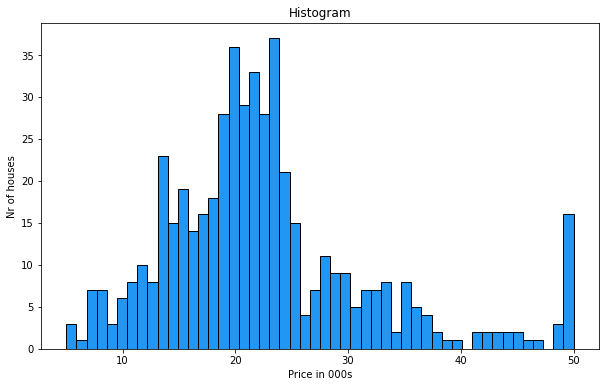

In [17]:
plt.figure(figsize=(10,6))
plt.title('Histogram')
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s')
plt.ylabel('Nr of houses')
plt.show()

<Figure size 1440x1440 with 0 Axes>

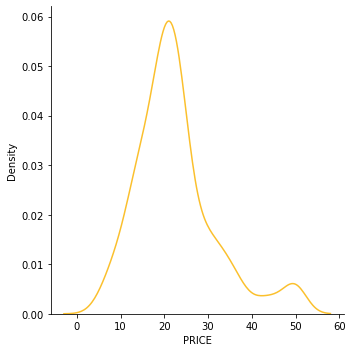

In [18]:
plt.figure(figsize=(20,20))
sns.displot(data['PRICE'], kind="kde", color='#fbc02d')
plt.show()

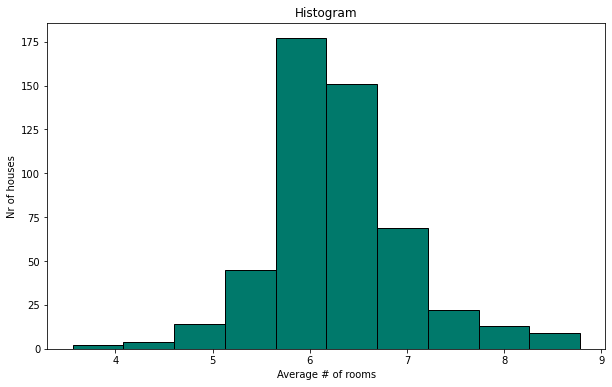

In [19]:
plt.figure(figsize=(10,6))
plt.title('Histogram')
plt.hist(data['RM'], ec='black', color='#00796b')
plt.xlabel('Average # of rooms')
plt.ylabel('Nr of houses')
plt.show()

In [20]:
data['RM'].mean()

6.284634387351787

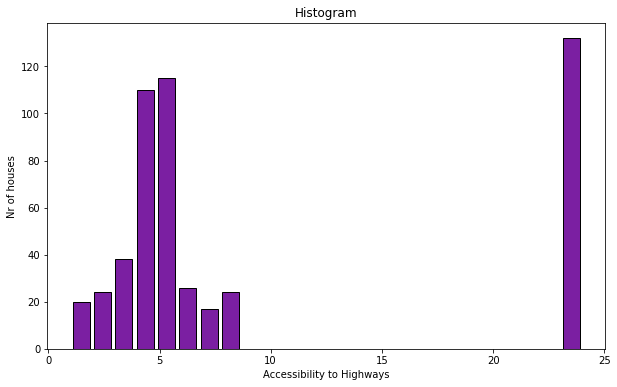

In [21]:
plt.figure(figsize=(10,6))
plt.title('Histogram')
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.8)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr of houses')
plt.show()

In [22]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

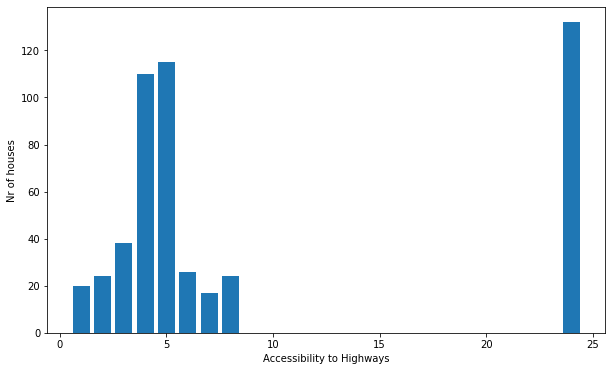

In [23]:
plt.figure(figsize=(10,6))

frequency = data['RAD'].value_counts()
plt.bar(frequency.index, height=frequency)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr of houses')
plt.show()

In [24]:
#How many properties are next to the river?
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [25]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [26]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [27]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [28]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

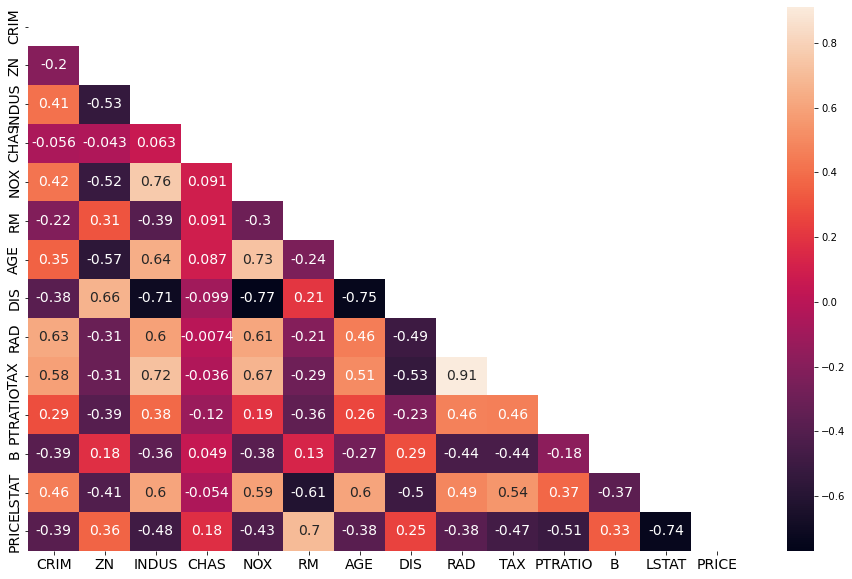

In [29]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

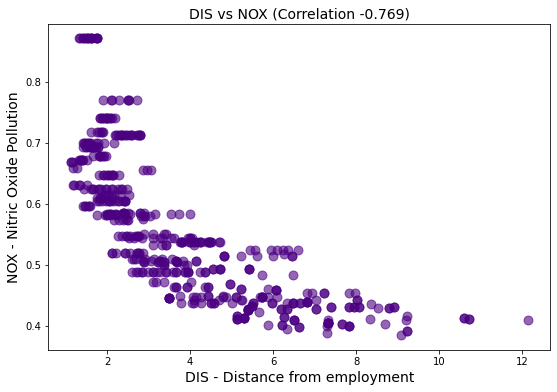

In [30]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

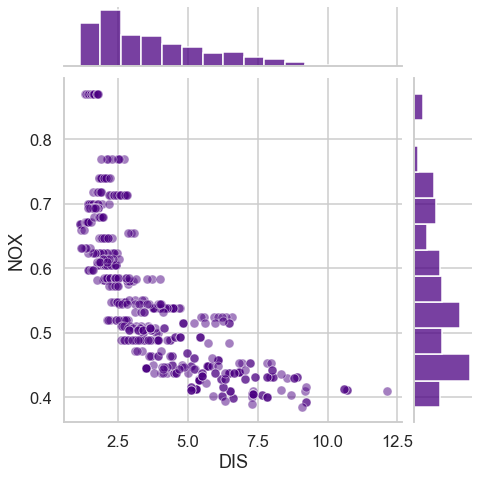

In [31]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

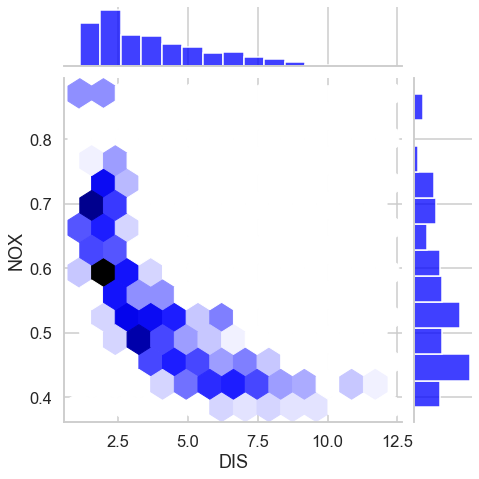

In [32]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='blue', kind='hex')
plt.show()

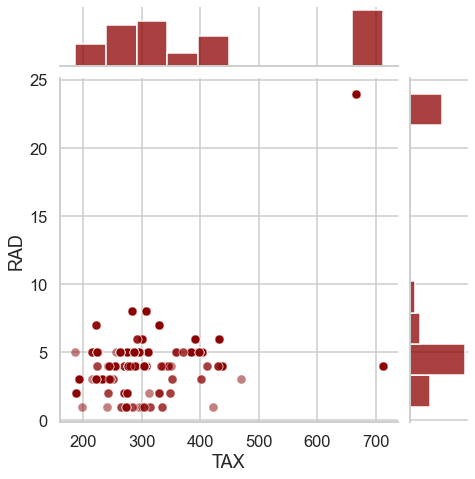

In [33]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

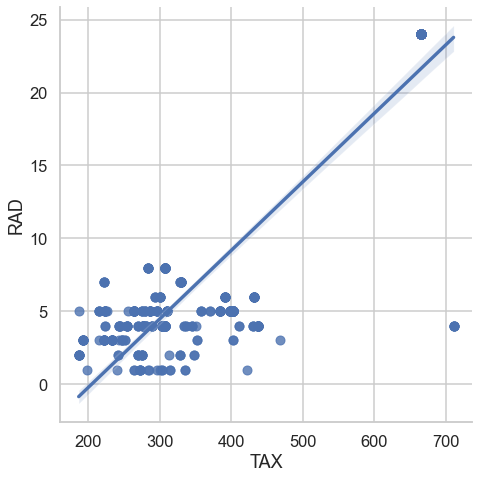

In [34]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

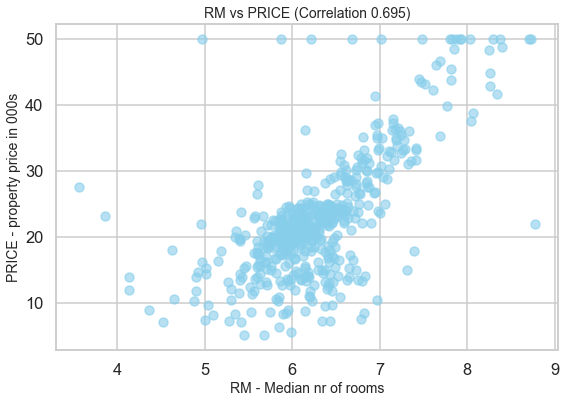

In [35]:
# House prices and the number of rooms (RM)

rm_tgt_corr = round(data['RM'].corr(data['PRICE']),3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

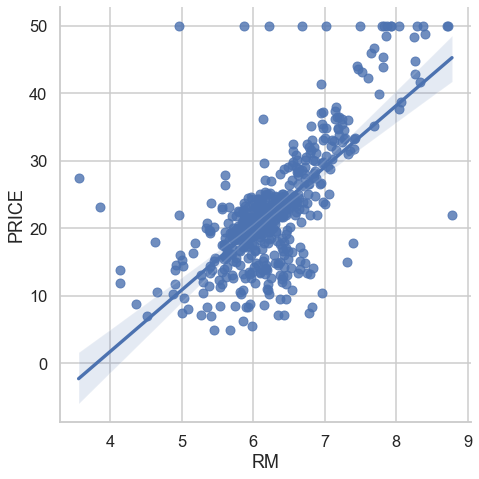

In [36]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

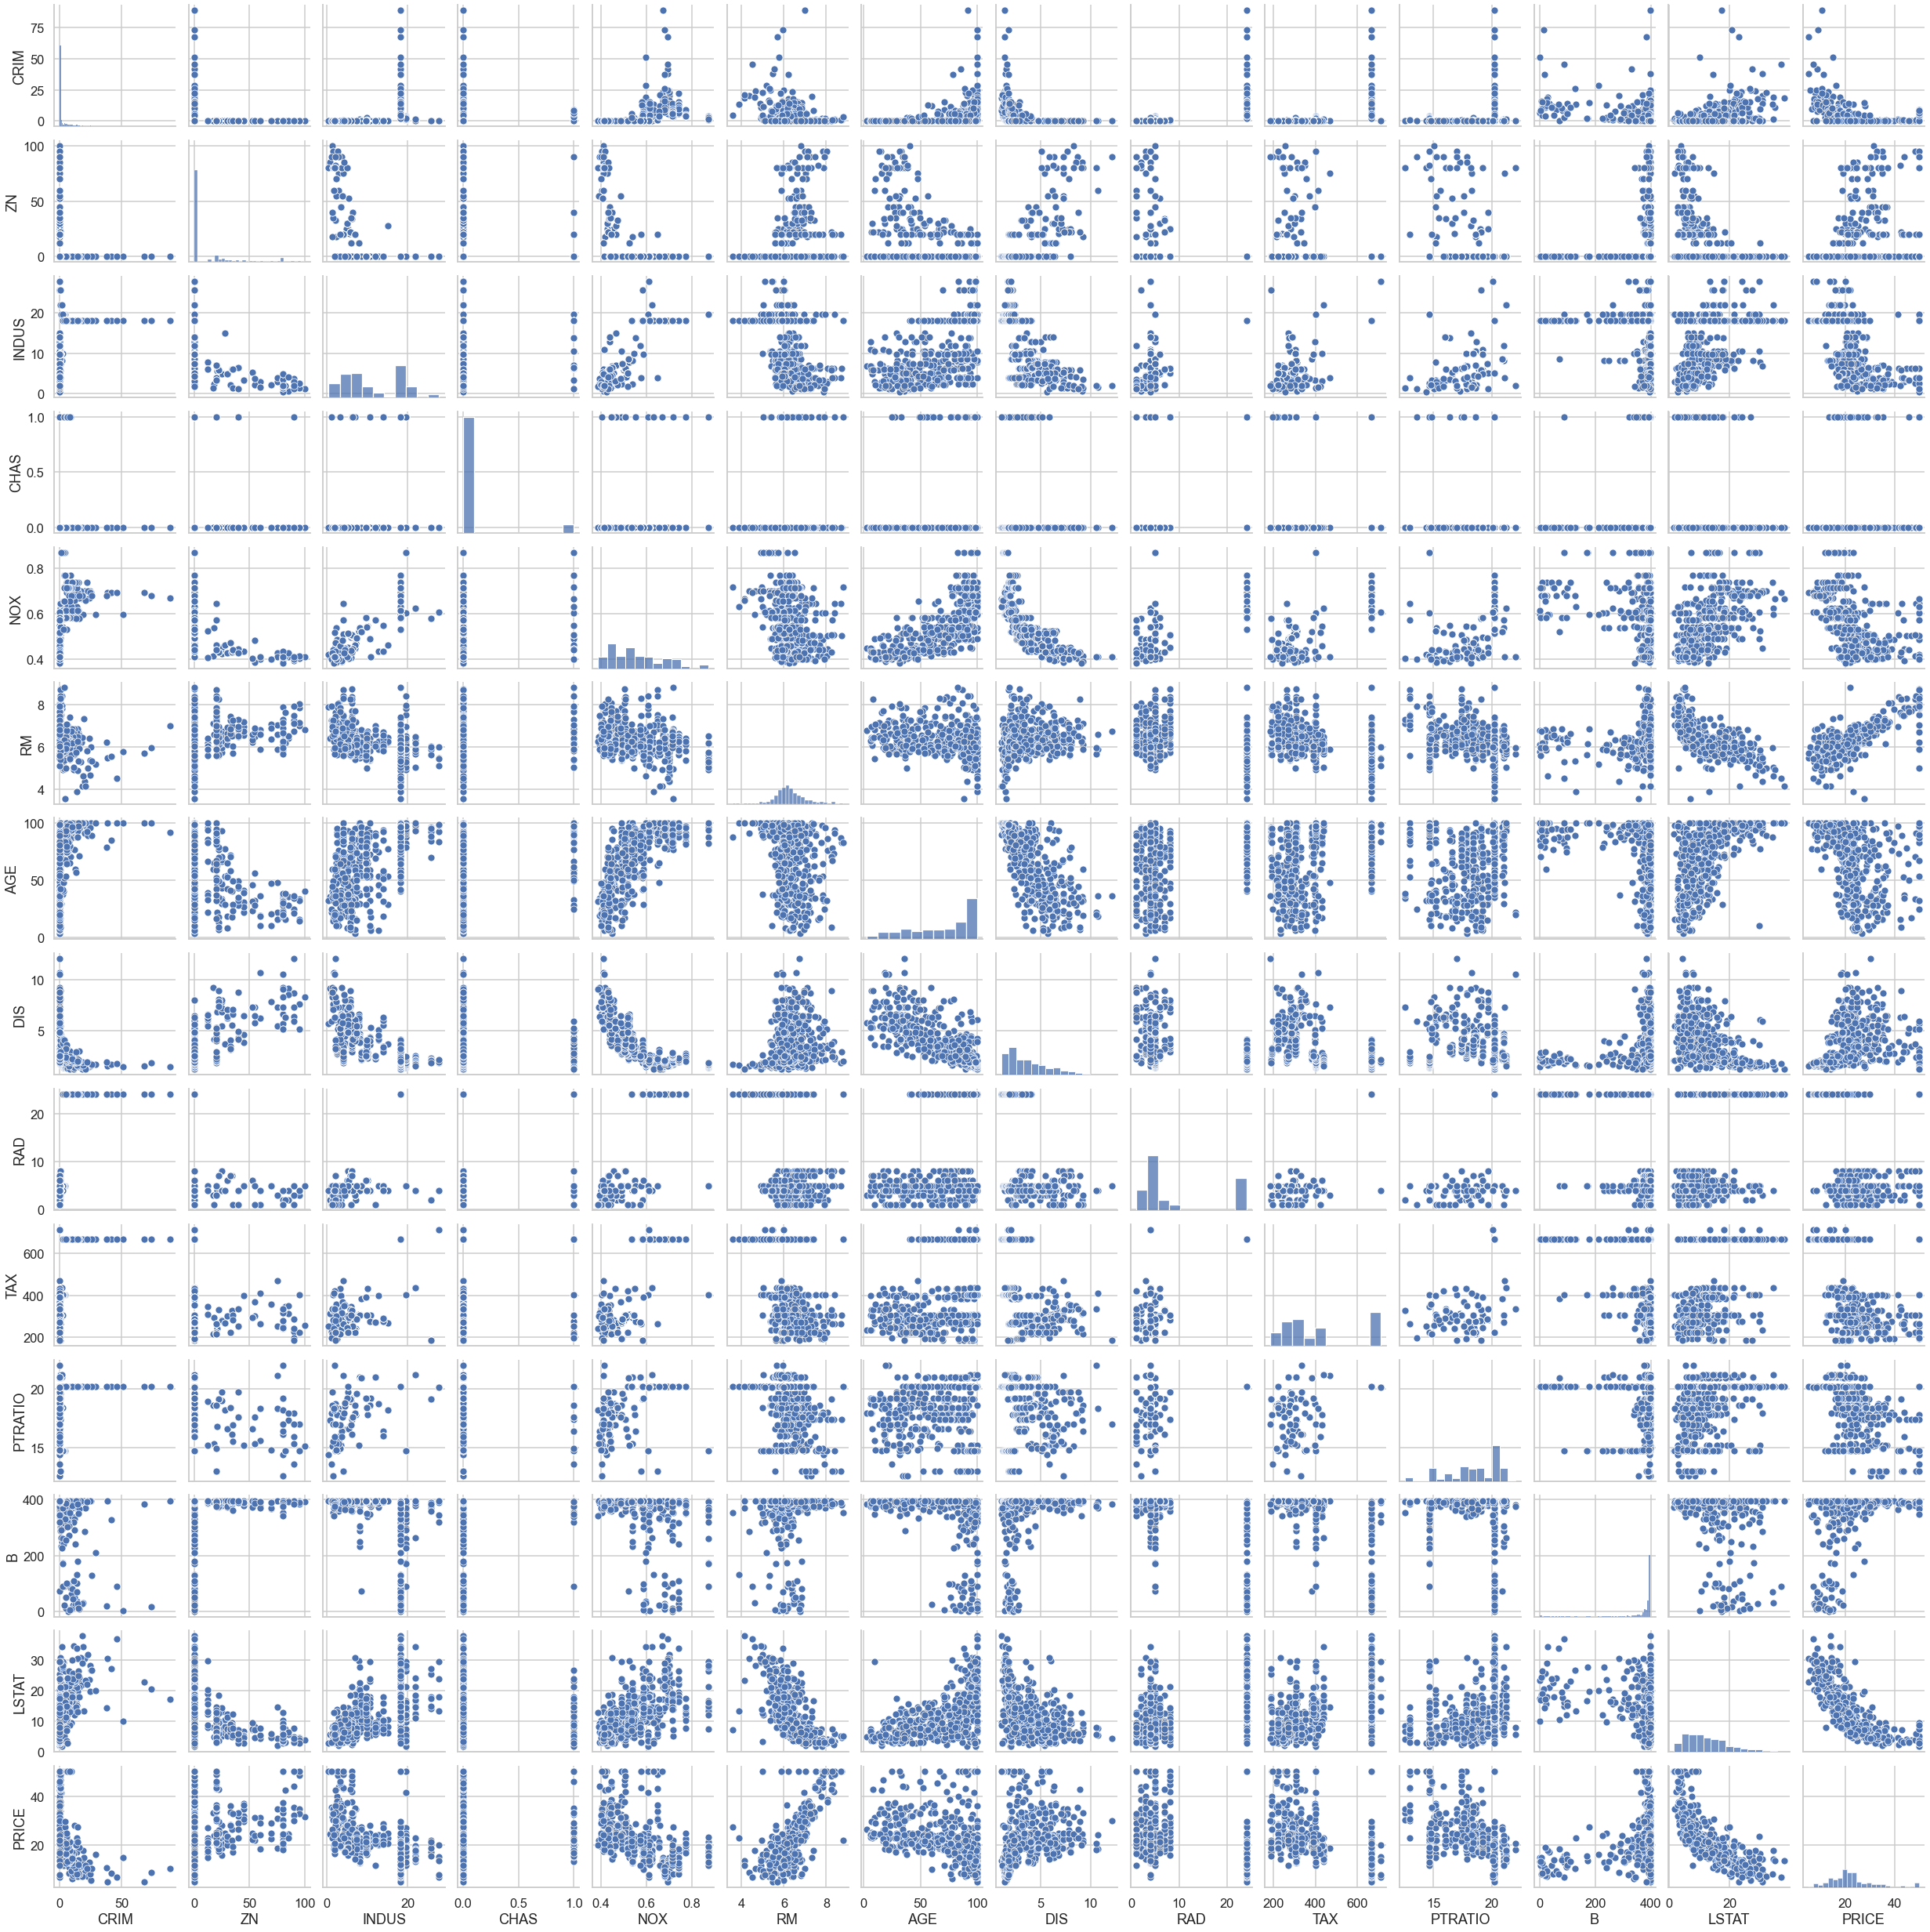

CPU times: total: 19.5 s
Wall time: 19.3 s


In [37]:
%%time

sns.pairplot(data)
plt.show()

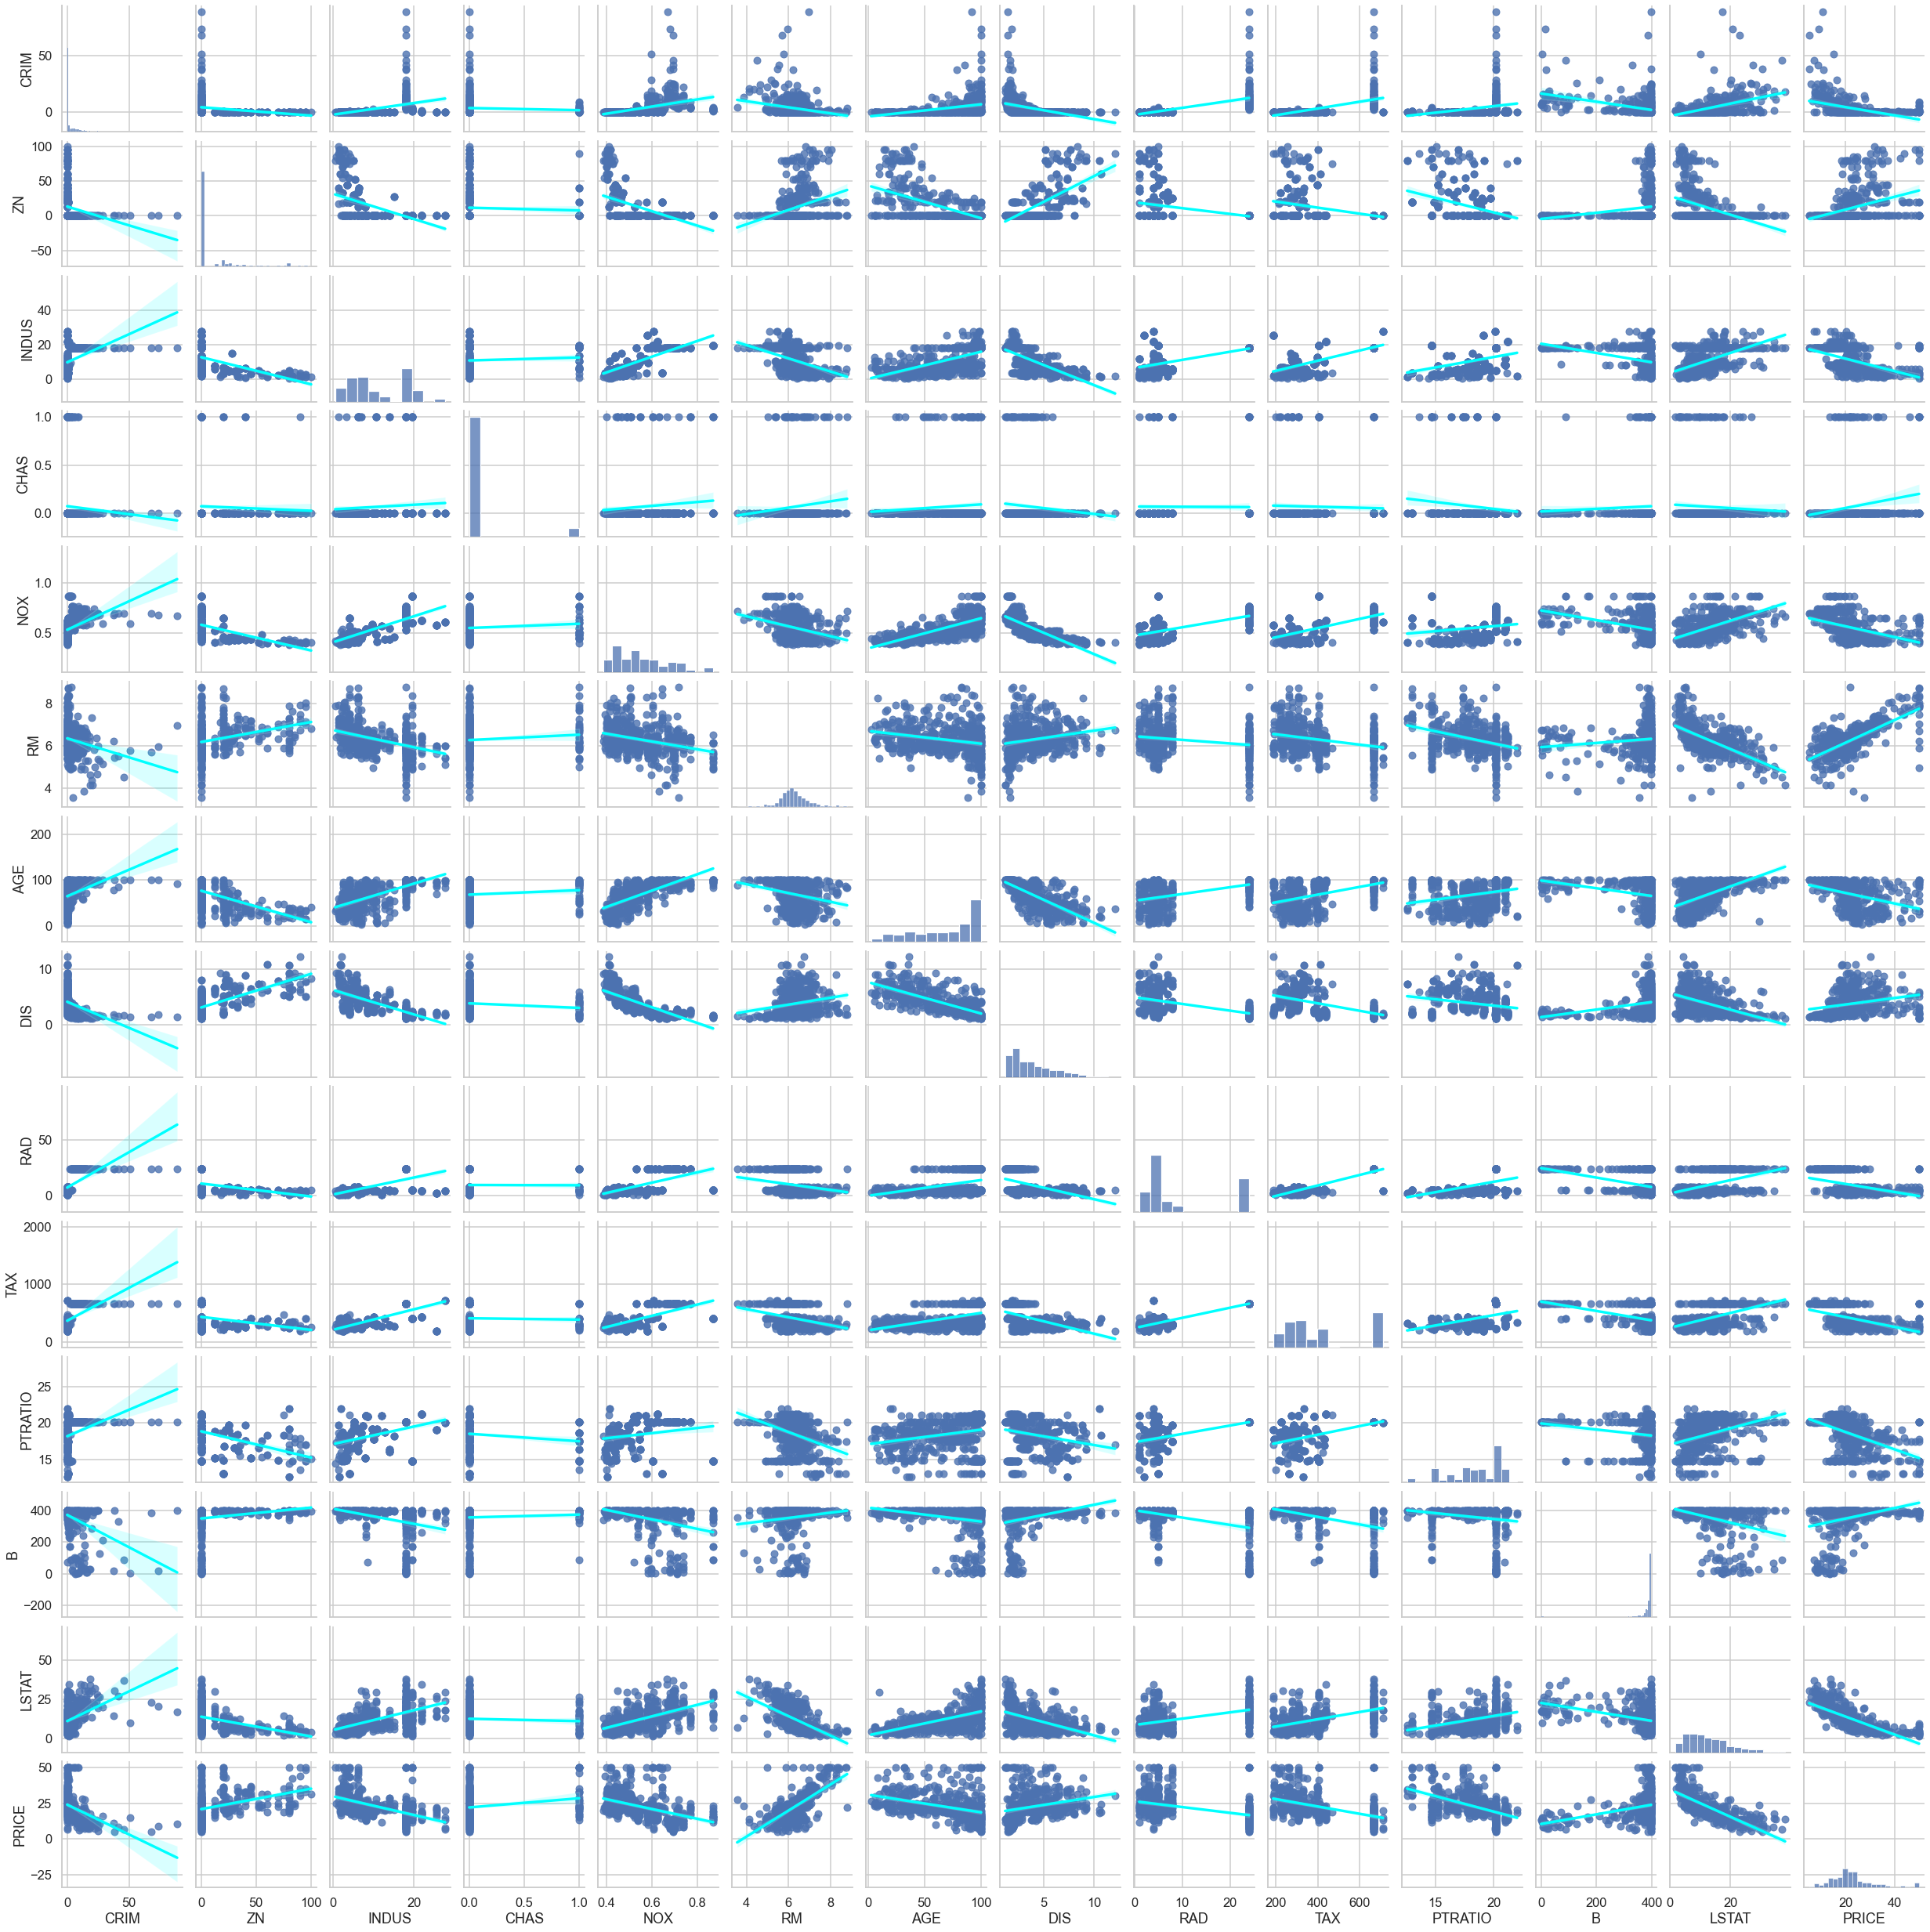

CPU times: total: 2min 17s
Wall time: 37.2 s


In [38]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

# Training & Test Dataset Split

In [39]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,prices, 
                                                    test_size=0.2, random_state=42)



In [40]:
# of training set
len(X_train)/len(features)

0.7984189723320159

In [41]:
# of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [42]:
#Instantiate the object
regr = LinearRegression()

# fit the model
regr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Do a sanity check
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 30.246750993923555


coef
CRIM     -0.113056
ZN        0.030110
INDUS     0.040381
CHAS      2.784438
NOX     -17.202633
RM        4.438835
AGE      -0.006296
DIS      -1.447865
RAD       0.262430
TAX      -0.010647
PTRATIO  -0.915456
B         0.012351
LSTAT    -0.508571

In [44]:
# Print out r-squared for training and test dataset
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.7508856358979673
Test data r-squared: 0.6687594935356288


# Data Transformations

In [45]:
data['PRICE'].skew()

1.1080984082549072

In [46]:
y_log = np.log(data['PRICE'])

In [47]:
y_log.skew()

-0.33032129530987864

<Figure size 1440x1440 with 0 Axes>

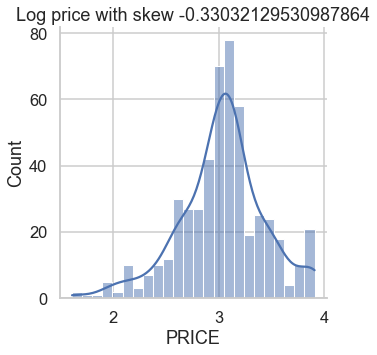

In [48]:
plt.figure(figsize=(20,20))
sns.displot(y_log, kde=True)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

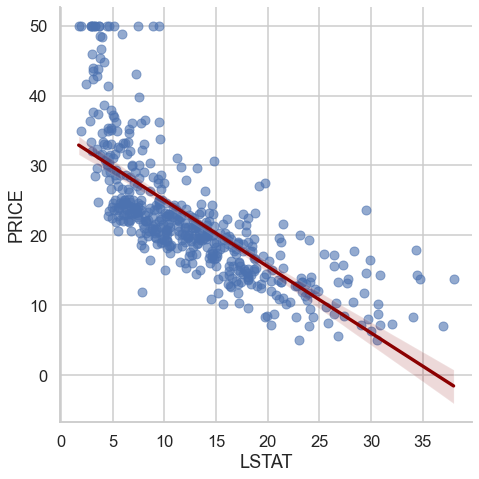

In [49]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

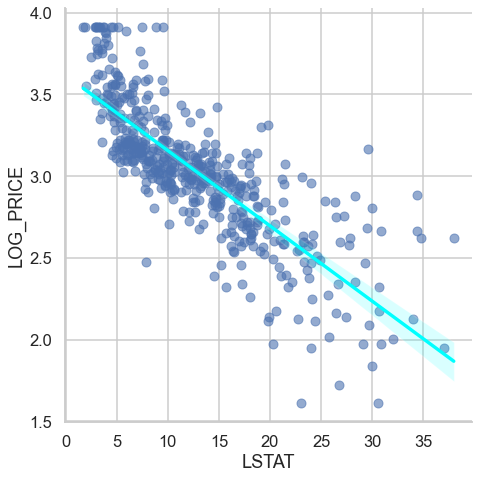

In [50]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using Log Prices

view #74 again.

In [51]:
prices = np.log(data['PRICE']) # Use Log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,prices, 
                                                    test_size=0.2, random_state=42)

#Instantiate the object
regr = LinearRegression()

# fit the model
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

# Do a sanity check
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.795714923175866
Test data r-squared: 0.7462724975382712
Intercept 3.8409203099175575


coef
CRIM    -0.009679
ZN       0.000757
INDUS    0.003057
CHAS     0.096207
NOX     -0.727261
RM       0.113095
AGE     -0.000139
DIS     -0.048944
RAD      0.011139
TAX     -0.000505
PTRATIO -0.036989
B        0.000579
LSTAT   -0.028321

In [52]:
# Charles River property premium
np.e**0.096207

1.1009869447050655

People are willing to pay 1100 more to live close to the river

## P values & Evaluating Coefficients

In [53]:
X_incl_const = sm.add_constant(X_train)

# OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

coef  p-values
const    3.840920     0.000
CRIM    -0.009679     0.000
ZN       0.000757     0.237
INDUS    0.003057     0.256
CHAS     0.096207     0.012
NOX     -0.727261     0.000
RM       0.113095     0.000
AGE     -0.000139     0.812
DIS     -0.048944     0.000
RAD      0.011139     0.000
TAX     -0.000505     0.003
PTRATIO -0.036989     0.000
B        0.000579     0.000
LSTAT   -0.028321     0.000

## Testing for MultiCollinearity


$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_{12}LSTAT $$

$$ VIF_{TAX} = \frac{1}{(1 - R_{TAX} ^ 2)} $$

In [58]:
type(X_incl_const)

pandas.core.frame.DataFrame

In [62]:
variance_inflation_factor(exog=X_incl_const, exog_idx=1)

1.7131869906128503

In [63]:
# Print out the number of columns in X_incl_const
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [66]:
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const, exog_idx=i))
print(vif)

[580.7472632659341, 1.7131869906128503, 2.465630718663123, 3.8778553502602815, 1.0966737120634569, 4.469150159170636, 1.9478087495837577, 2.9899478376482778, 4.16857837354429, 7.658315779148442, 8.943301431814218, 1.8514484070670416, 1.3251213980906684, 2.818045379538575]


In [68]:
pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif': np.around(vif,2)})

coef_name     vif
0      const  580.75
1       CRIM    1.71
2         ZN    2.47
3      INDUS    3.88
4       CHAS    1.10
5        NOX    4.47
6         RM    1.95
7        AGE    2.99
8        DIS    4.17
9        RAD    7.66
10       TAX    8.94
11   PTRATIO    1.85
12         B    1.33
13     LSTAT    2.82

### Any features that have threshold > 10 would need close inspection.


In [69]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Model Simplification &  Baysian Information Criterion (BIC)

In [73]:
# Original model with log prices and all features
X_incl_const = sm.add_constant(X_train)

# OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

#Print BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -129.53438883693332
r-squared is 0.7957149231758661


In [76]:
# Reduce model 
#1. excluding INDUS model 

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

# OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

#Print BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -134.20023023222353
r-squared is 0.7950384647288367


### BIC increased and R square maintains. even though 1 feature is dropped, it does not impact the fit it any way.

In [77]:
# Reduce model 
#1. excluding INDUS and AGE features

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

# OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

#Print BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -140.15789143465733
r-squared is 0.795016265951262


In [78]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-values      coef  p-values      coef  p-values
const    3.840920     0.000  3.836033     0.000  3.838936     0.000
CRIM    -0.009679     0.000 -0.009711     0.000 -0.009719     0.000
ZN       0.000757     0.237  0.000669     0.292  0.000681     0.280
INDUS    0.003057     0.256       NaN       NaN       NaN       NaN
CHAS     0.096207     0.012  0.100668     0.008  0.100426     0.008
NOX     -0.727261     0.000 -0.675162     0.000 -0.683748     0.000
RM       0.113095     0.000  0.110276     0.000  0.109504     0.000
AGE     -0.000139     0.812 -0.000120     0.837       NaN       NaN
DIS     -0.048944     0.000 -0.050712     0.000 -0.050109     0.000
RAD      0.011139     0.000  0.010318     0.001  0.010364     0.000
TAX     -0.000505     0.003 -0.000430     0.006 -0.000430     0.006
PTRATIO -0.036989     0.000 -0.036366     0.000 -0.036480     0.000
B        0.000579     0.000  0.000572     0.000  0.000571     0.000
LSTAT   -0.028321     0.000 -0.028168     0.000 -0.028305     0.000

# Residual & Residual Plots

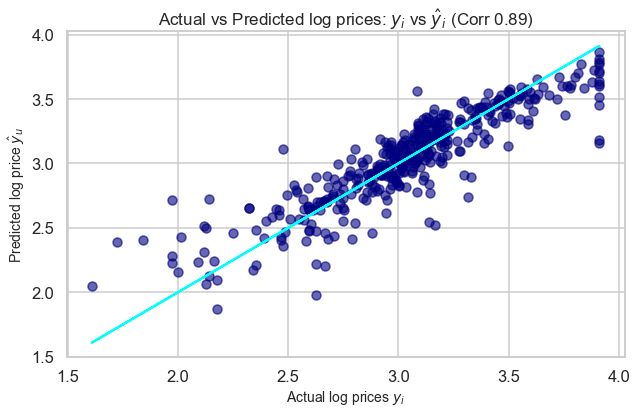

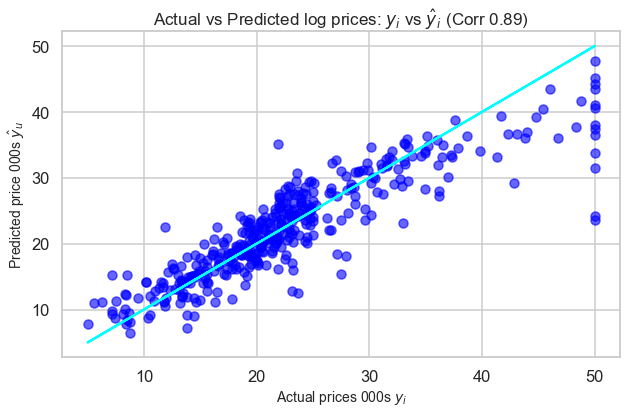

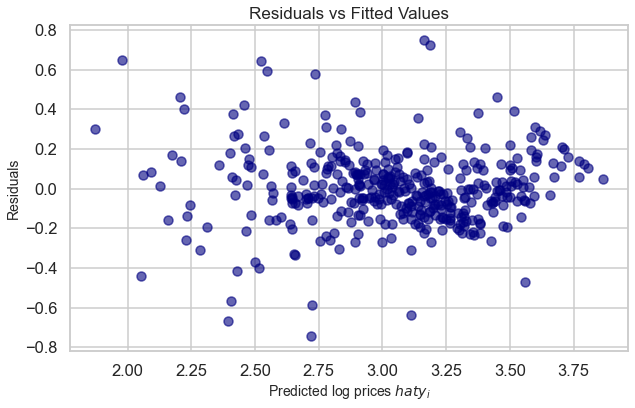

In [95]:
prices = np.log(data['PRICE']) # Use Log prices & simplified (dropping two features)
features = data.drop(['PRICE','INDUS','AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,prices, 
                                                    test_size=0.2, random_state=42)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)

# OLS = Ordinary Least Square
model = sm.OLS(y_train, X_incl_const)

# Fit the model
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
#residuals.describe()
#results.resid

# Graph of Actual vs Predicted prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log price $\hat y _u$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Plot a grapth to Reverse log prices by using np.e**

plt.figure(figsize=(10,6))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted price 000s $\hat y _u$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

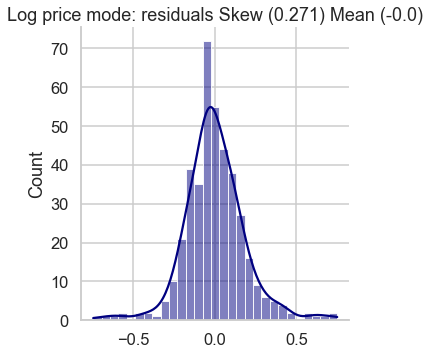

In [102]:
# Distribution of Residuals (log prices) = checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.displot(results.resid, kde=True, color='navy')
plt.title(f'Log price mode: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [ ]:
# Plt of actual vs predicted prices (incl.correlation) usina a different color
# Plot of residuals vs predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyze the results.

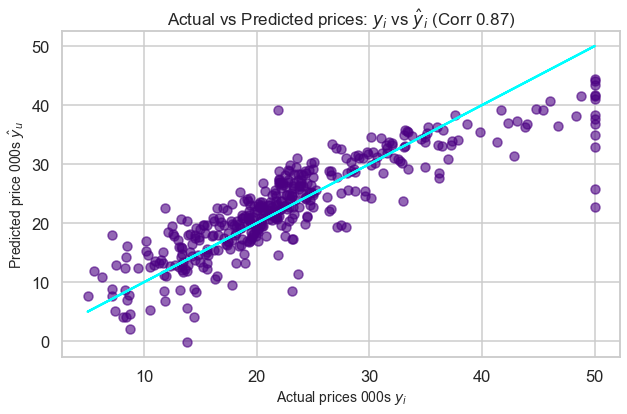

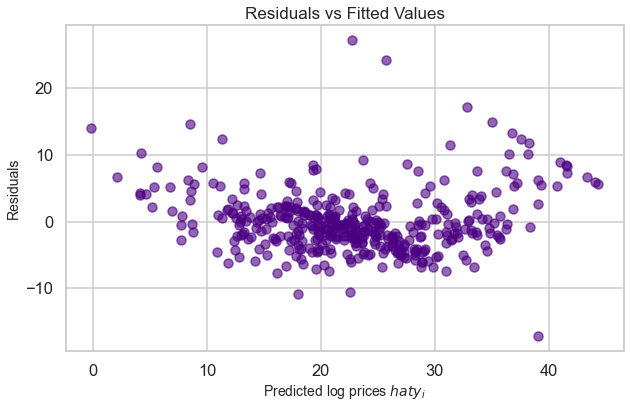

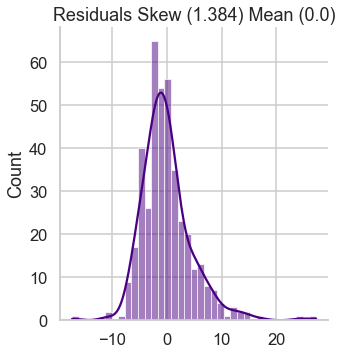

In [103]:
# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,prices, 
                                                    test_size=0.2, random_state=42)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

# Fit the model
results = model.fit()

# Graph of Actual vs Predicted prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted price 000s $\hat y _u$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted log prices $hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residuals Distribution Chart
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.displot(results.resid, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

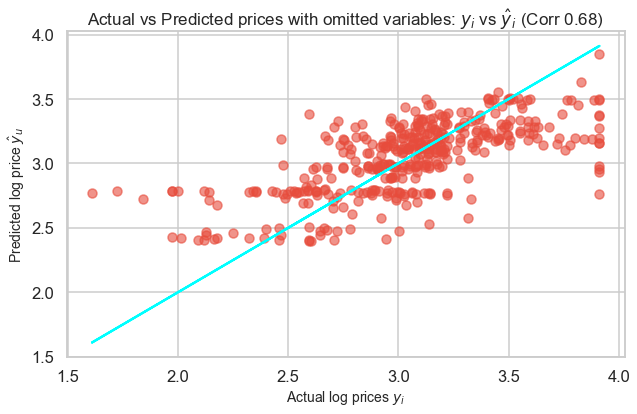

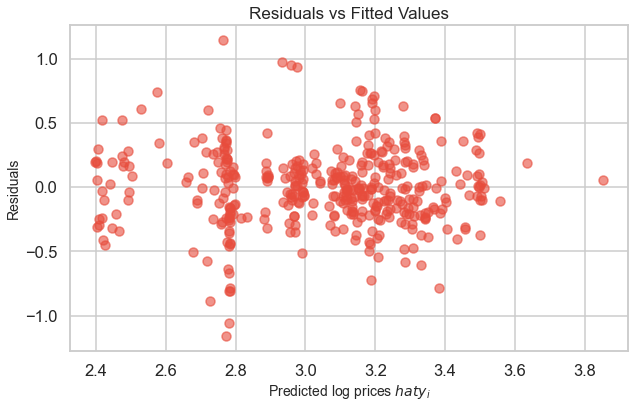

In [105]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,prices, 
                                                    test_size=0.2, random_state=42)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

# Fit the model
results = model.fit()

# Graph of Actual vs Predicted prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log price $\hat y _u$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted log prices $hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()
